This analysys involves testing if a dataset with different liquids could generate a good Decision Tree model.
In this case we are NOT including the name of the liquid AND NOT including voltage and flow_rate, but unidimensional voltage and unidimensional flow rate to the dataset.

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [48]:
df = pd.read_feather('../data/EW64_EW8515_EWG343_EWP541_relabeled.feather')
df.head()

,name,mean,variance,deviation,median,rms,spray_mode,voltage,flow_rate,Undimensional_flowrate,Undimensional_voltage
0,setup/liquid/EW64,1.223271,12.602918,3.550059,1.260875,3.754905,Undefined,3000.38,1.0,6.351324,1.817137
1,setup/liquid/EW64,0.986307,12.542054,3.541476,1.008700,3.676256,Undefined,3000.38,1.0,6.351324,1.817137
2,setup/liquid/EW64,0.873368,12.659608,3.558034,0.756525,3.663656,Dripping,3000.38,1.0,6.351324,1.817137
3,setup/liquid/EW64,1.310569,12.849416,3.584608,1.260875,3.816675,Undefined,3000.38,1.0,6.351324,1.817137
4,setup/liquid/EW64,0.965084,13.203416,3.633651,1.008700,3.759628,Undefined,3200.39,1.0,6.351324,2.067478


In [49]:
df = df.drop(['name', 'flow_rate', 'voltage'], axis='columns')
df["mean/median"] = df["mean"]/df["median"]
df["std_dev/median"] = df["deviation"]/df["median"]
df.head()

,mean,deviation,median,rms,spray_mode,Undimensional_flowrate,Undimensional_voltage,mean/median,std_dev/median
0,1.223271,3.550059,1.260875,3.754905,Undefined,6.351324,1.817137,0.970176,2.815552
1,0.986307,3.541476,1.008700,3.676256,Undefined,6.351324,1.817137,0.977800,3.510931
2,0.873368,3.558034,0.756525,3.663656,Dripping,6.351324,1.817137,1.154447,4.703128
3,1.310569,3.584608,1.260875,3.816675,Undefined,6.351324,1.817137,1.039412,2.842953
4,0.965084,3.633651,1.008700,3.759628,Undefined,6.351324,2.067478,0.956760,3.602310


In [50]:
# Checking if there are any infinite values 
print(len(df.loc[((df['mean/median'] == np.inf) | (df['std_dev/median'] == np.inf))]))

1426


In [51]:
# Checking the proportion of infinite values / total values
print(len(df))

54227


In [52]:
# Due to the previous analysis, it is alright to say that we can just remove the lines with inf value
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.shape

(52801, 9)

In [53]:
X = df.drop(['spray_mode'], axis="columns")
y = df['spray_mode']
y.unique()

array(['Undefined', 'Dripping', 'Intermittent', 'Cone Jet', 'Multi Jet',
       'Corona'], dtype=object)

In [54]:
X.head()

,mean,deviation,median,rms,Undimensional_flowrate,Undimensional_voltage,mean/median,std_dev/median
0,1.223271,3.550059,1.260875,3.754905,6.351324,1.817137,0.970176,2.815552
1,0.986307,3.541476,1.008700,3.676256,6.351324,1.817137,0.977800,3.510931
2,0.873368,3.558034,0.756525,3.663656,6.351324,1.817137,1.154447,4.703128
3,1.310569,3.584608,1.260875,3.816675,6.351324,1.817137,1.039412,2.842953
4,0.965084,3.633651,1.008700,3.759628,6.351324,2.067478,0.956760,3.602310


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print(y_train.unique())
print(y_test.unique())
model = DecisionTreeClassifier()

['Cone Jet' 'Intermittent' 'Multi Jet' 'Undefined' 'Dripping' 'Corona']
['Intermittent' 'Cone Jet' 'Multi Jet' 'Undefined' 'Dripping' 'Corona']


In [56]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
model.score(X_train, y_train)

1.0

In [58]:
model.score(X_test, y_test)

0.9808724196704753

[Text(0.730833456549846, 0.9782608695652174, 'x[7] <= 1.101\ngini = 0.779\nsamples = 36960\nvalue = [8004, 2, 3357, 10620, 6750, 8227]'),
 Text(0.5915799852827905, 0.9347826086956522, 'x[8] <= 0.511\ngini = 0.693\nsamples = 22056\nvalue = [8004, 2, 973, 103, 6750, 6224]'),
 Text(0.382609794509243, 0.8913043478260869, 'x[6] <= 9.892\ngini = 0.591\nsamples = 16417\nvalue = [7931, 1, 290, 45, 6721, 1429]'),
 Text(0.12116011498679577, 0.8478260869565217, 'x[7] <= 0.9\ngini = 0.432\nsamples = 8817\nvalue = [6485, 1, 290, 38, 993, 1010]'),
 Text(0.011839788732394366, 0.8043478260869565, 'x[7] <= -0.0\ngini = 0.487\nsamples = 911\nvalue = [0, 0, 290, 38, 0, 583]'),
 Text(0.010431338028169014, 0.7608695652173914, 'gini = 0.0\nsamples = 290\nvalue = [0, 0, 290, 0, 0, 0]'),
 Text(0.013248239436619718, 0.7608695652173914, 'x[8] <= 0.443\ngini = 0.115\nsamples = 621\nvalue = [0, 0, 0, 38, 0, 583]'),
 Text(0.011839788732394366, 0.717391304347826, 'x[8] <= 0.432\ngini = 0.007\nsamples = 585\nvalue =

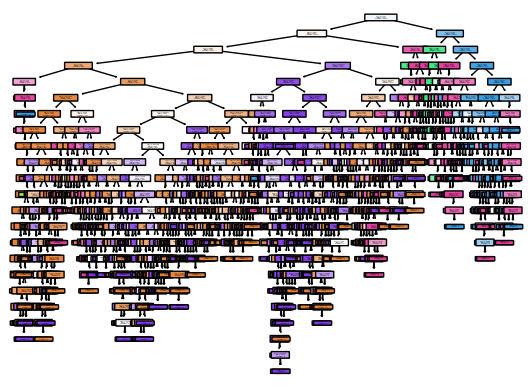

In [33]:
plot_tree(model, filled = True, rounded = True)

['Intermittent' 'Cone Jet' 'Multi Jet' 'Undefined' 'Dripping' 'Corona']


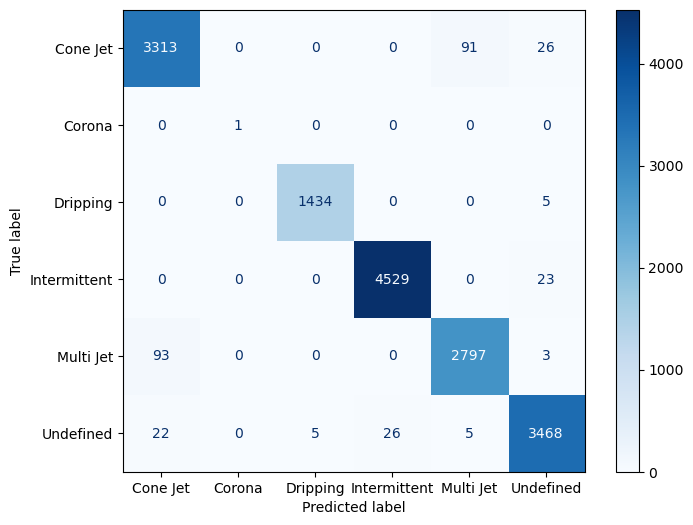

In [34]:
import matplotlib.pyplot as plt

predicted_labels = model.predict(X_test)
true_labels = y_test

print(y_test.unique())

label_names = ['Cone Jet', 'Corona', 'Dripping', 'Intermittent', 'Multi Jet', 'Undefined']
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)

fig, ax = plt.subplots(figsize=(8,6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

In [35]:
feature_names = X.columns
feature_importances = model.feature_importances_

feature_importances_dict = dict(zip(feature_names, feature_importances))
feature_importances_dict

{'mean': 0.1371597389082798,
 'variance': 0.008578713843226058,
 'deviation': 0.016591629688999684,
 'median': 0.02970381430560495,
 'rms': 0.019386117172965824,
 'Undimensional_flowrate': 0.06707691536928187,
 'Undimensional_voltage': 0.14372628315719638,
 'mean/median': 0.3340890436015082,
 'std_dev/median': 0.24368774395293724}

Now, using the model obtained, we are going to predict the values of the spray_mode of a dataset without classification

In [36]:
df = pd.read_feather('../data/EW55_testing.feather')
df = df.drop(['index', 'name', 'flow_rate', 'voltage'], axis='columns')
df.head()

,mean,variance,deviation,median,rms,Undimensional_flowrate,Undimensional_voltage
0,0.394239,80.314468,8.961834,1.509434,8.970501,2.937326,1.570913
1,0.383140,82.854767,9.102459,1.509434,9.110519,2.937326,1.570913
2,0.350491,81.767532,9.042541,1.509434,9.049331,2.937326,1.570913
3,0.048719,81.586067,9.032500,1.257862,9.032632,2.937326,1.570913
4,0.089610,82.632835,9.090261,1.006289,9.090702,2.937326,1.570913


In [37]:
df["mean/median"] = df["mean"]/df["median"]
df["std_dev/median"] = df["deviation"]/df["median"]
df.head()

,mean,variance,deviation,median,rms,Undimensional_flowrate,Undimensional_voltage,mean/median,std_dev/median
0,0.394239,80.314468,8.961834,1.509434,8.970501,2.937326,1.570913,0.261183,5.937215
1,0.383140,82.854767,9.102459,1.509434,9.110519,2.937326,1.570913,0.253830,6.030379
2,0.350491,81.767532,9.042541,1.509434,9.049331,2.937326,1.570913,0.232200,5.990683
3,0.048719,81.586067,9.032500,1.257862,9.032632,2.937326,1.570913,0.038732,7.180838
4,0.089610,82.632835,9.090261,1.006289,9.090702,2.937326,1.570913,0.089050,9.033447


In [38]:
len(df.loc[(df['mean/median'] == np.inf) | (df['std_dev/median'] == np.inf)])

0

In [39]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.head()

,mean,variance,deviation,median,rms,Undimensional_flowrate,Undimensional_voltage,mean/median,std_dev/median
0,0.394239,80.314468,8.961834,1.509434,8.970501,2.937326,1.570913,0.261183,5.937215
1,0.383140,82.854767,9.102459,1.509434,9.110519,2.937326,1.570913,0.253830,6.030379
2,0.350491,81.767532,9.042541,1.509434,9.049331,2.937326,1.570913,0.232200,5.990683
3,0.048719,81.586067,9.032500,1.257862,9.032632,2.937326,1.570913,0.038732,7.180838
4,0.089610,82.632835,9.090261,1.006289,9.090702,2.937326,1.570913,0.089050,9.033447


In [40]:
predicted_labels = model.predict(df)
len(predicted_labels)

26005

In [41]:
# Importing and treating the true values of the label to compare

df = pd.read_feather("../data/EW55_relabeled.feather")
df = df.drop(['name'], axis='columns')
df["mean/median"] = df["mean"]/df["median"]
df["std_dev/median"] = df["deviation"]/df["median"]
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
true_values = df['spray_mode']
len(true_values)

26005

In [42]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(predicted_labels, true_values)
accuracy

0.745279753893482

Now we are going to plot the mode classification map based on the prediction we have made

In [43]:
df['spray_mode'] = predicted_labels
df = df.drop(['index'], axis='columns')
df.head()

,mean,variance,deviation,median,rms,spray_mode,voltage,flow_rate,Undimensional_flowrate,Undimensional_voltage,mean/median,std_dev/median
0,0.394239,80.314468,8.961834,1.509434,8.970501,Intermittent,3001.68,1.0,2.937326,1.570913,0.261183,5.937215
1,0.383140,82.854767,9.102459,1.509434,9.110519,Intermittent,3001.68,1.0,2.937326,1.570913,0.253830,6.030379
2,0.350491,81.767532,9.042541,1.509434,9.049331,Intermittent,3001.68,1.0,2.937326,1.570913,0.232200,5.990683
3,0.048719,81.586067,9.032500,1.257862,9.032632,Intermittent,3001.68,1.0,2.937326,1.570913,0.038732,7.180838
4,0.089610,82.632835,9.090261,1.006289,9.090702,Intermittent,3001.68,1.0,2.937326,1.570913,0.089050,9.033447


In [44]:
import seaborn as sns
sns.set(color_codes=True)
from matplotlib.lines import Line2D

def plot_mapping(df):

    colormap = []
    for electro_class in df['spray_mode']:
        if electro_class == 'Intermittent':
            colormap.append('red')
        elif electro_class == 'Cone Jet':
            colormap.append('orange')
        elif electro_class == 'Dripping':
            colormap.append('blue')
        elif electro_class == 'Multi Jet':
            colormap.append('purple')
        elif electro_class == 'Undefined':
            colormap.append('green')
        elif electro_class == 'Corona':
            colormap.append('pink')    
        else:
            colormap.append('orange')


    df.insert(1, 'colormap', colormap)
    df.info()

    #Scatterplot

    inverse_voltage = df['voltage']
    inverse_flow_rate = df['flow_rate']

    plt.rcParams.update({'font.size': 15})  # Update font size

    # Set Colors
    custom_palette = {'blue': 'steelblue', 'orange': 'orange', 'red': 'firebrick', 'green': 'green', 'purple': 'rebeccapurple', 'pink':'hotpink'}

    # Plot
    fig, ax = plt.subplots(figsize=(22, 9))

    scatterplot = sns.scatterplot(data=df, x='Undimensional_flowrate', y='Undimensional_voltage', hue='colormap', palette=custom_palette, ax=ax, alpha=0.7, s=80)
    ax.set_xscale("log")
    ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax.set_yticks([2, 4, 6, 8, 10, 12, 14])
    ax.set_xticks([2.9, 5.9, 14.7, 29.5, 58.8, 147.1, 294.1, 588.2, 1200, 2941])
    #1, 2, 5, 10, 20, 50, 100, 200, 400, 1000
    0.3404456490
    ax.set_ylabel('γ1', fontsize=16, labelpad=1)
    ax.set_xlabel('Q / Q0', fontsize=16,labelpad=15)

    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Dripping', markerfacecolor='steelblue', markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='Intermittent', markerfacecolor='firebrick', markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='Multi Jet', markerfacecolor='rebeccapurple', markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='Cone Jet', markerfacecolor='orange', markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='Undefined', markerfacecolor='green', markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='Corona', markerfacecolor='hotpink', markersize=10)
                    ]

    plt.title("Mapping Jet Modes - EW55", fontsize=18, pad=20)
    ax.legend(handles=legend_elements, bbox_to_anchor=(1.13, 1), fontsize=16)

    plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26005 entries, 0 to 26004
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean                    26005 non-null  float64
 1   colormap                26005 non-null  object 
 2   variance                26005 non-null  float64
 3   deviation               26005 non-null  float64
 4   median                  26005 non-null  float64
 5   rms                     26005 non-null  float64
 6   spray_mode              26005 non-null  object 
 7   voltage                 26005 non-null  float64
 8   flow_rate               26005 non-null  float64
 9   Undimensional_flowrate  26005 non-null  float64
 10  Undimensional_voltage   26005 non-null  float64
 11  mean/median             26005 non-null  float64
 12  std_dev/median          26005 non-null  float64
dtypes: float64(11), object(2)
memory usage: 2.6+ MB


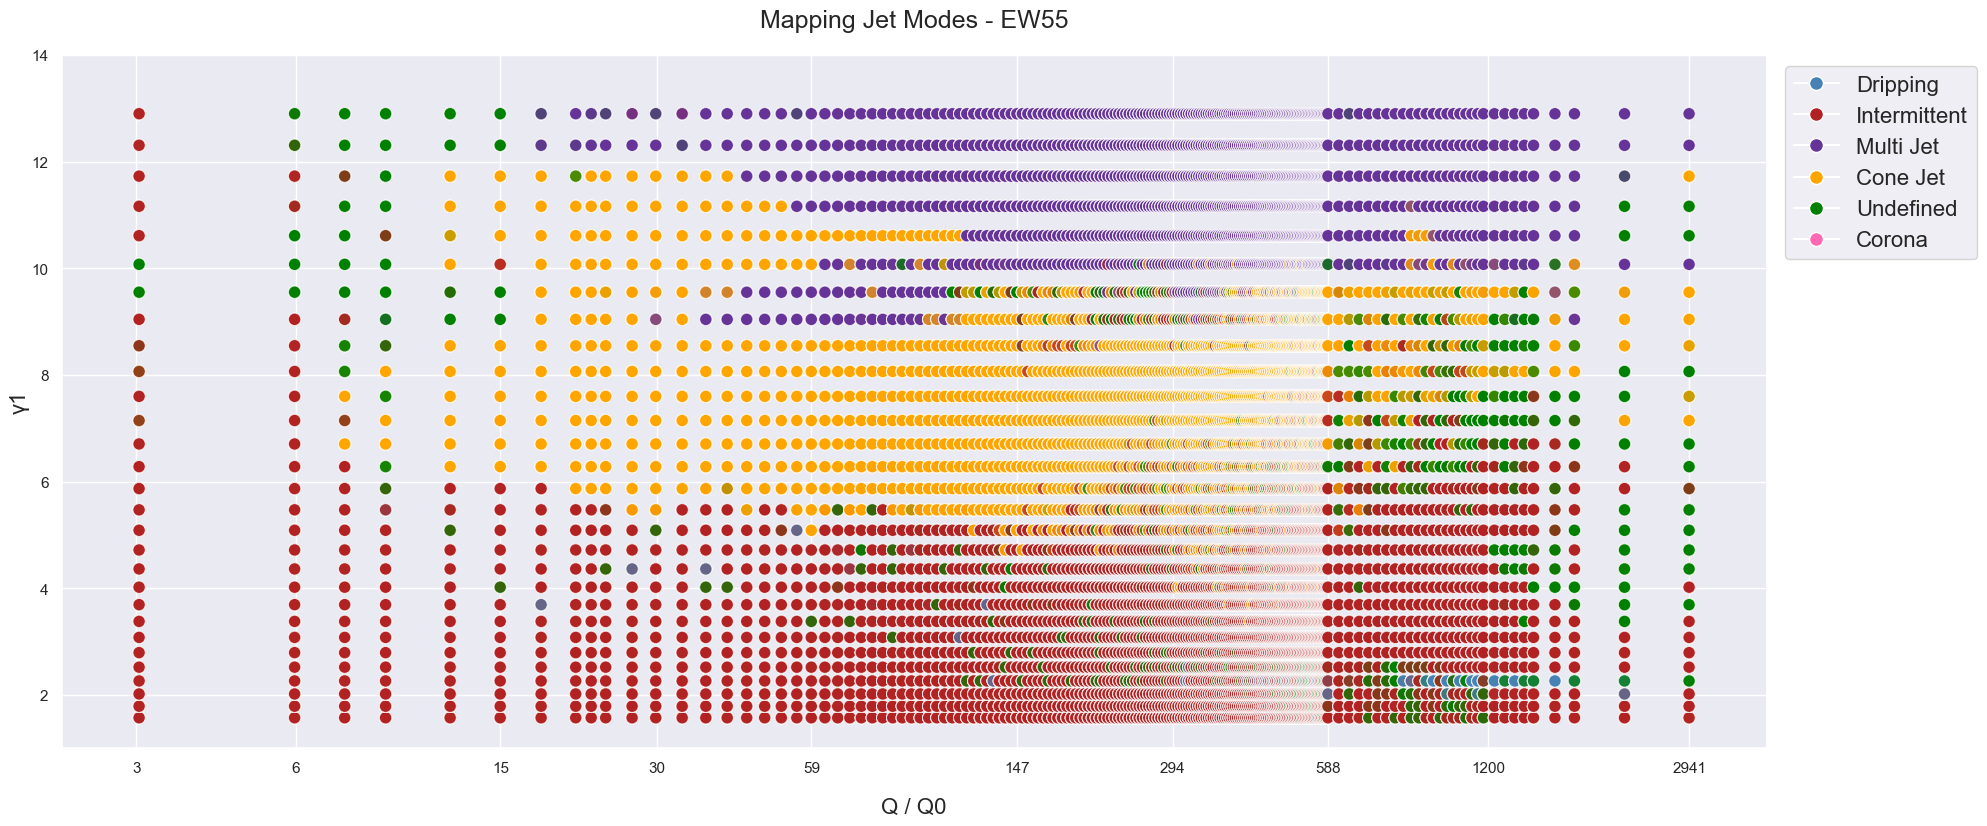

In [45]:
plot_mapping(df)

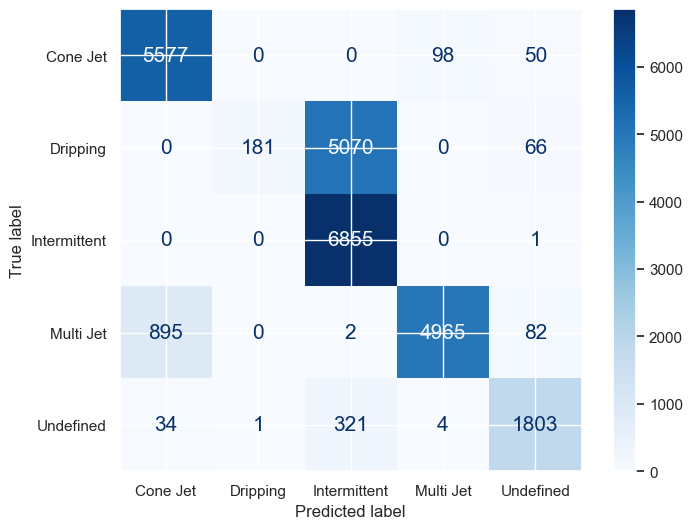

In [46]:
label_names = ['Cone Jet', 'Dripping', 'Intermittent', 'Multi Jet', 'Undefined']
cm = confusion_matrix(true_values, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)

fig, ax = plt.subplots(figsize=(8,6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()